# Pandas

https://bedford-computing.co.uk/learning/wp-content/uploads/2015/10/Python-for-Data-Analysis.pdf

In [4]:
import pandas as pd
import numpy as np

## Series

In [4]:
s = pd.Series([0.2, 0.4, 0.5])

In [5]:
s

0    0.2
1    0.4
2    0.5
dtype: float64

In [6]:
"_ " * 64

'_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ '

In [10]:
s.index

RangeIndex(start=0, stop=3, step=1)

In [11]:
s.values

array([0.2, 0.4, 0.5])

In [14]:
s[0]

0.2

In [23]:
s1 = pd.Series([1, 2, 4, 8], index=["a", "b", "c", "d"])

In [24]:
s1

a    1
b    2
c    4
d    8
dtype: int64

In [25]:
s1[0]

1

In [26]:
s1["a"]

1

In [27]:
s1 * 2

a     2
b     4
c     8
d    16
dtype: int64

In [28]:
np.exp(s1)

a       2.718282
b       7.389056
c      54.598150
d    2980.957987
dtype: float64

In [29]:
s2 = pd.Series({"banane": 2, "kiwi": 3, "mangue": 5, "pomme": 1, "mandarine": 1.5})

In [31]:
s2

banane       2.0
kiwi         3.0
mangue       5.0
pomme        1.0
mandarine    1.5
dtype: float64

In [32]:
s2 > 2

banane       False
kiwi          True
mangue        True
pomme        False
mandarine    False
dtype: bool

In [38]:
s2[s2 > 2]

kiwi      3.0
mangue    5.0
dtype: float64

In [35]:
s2[(s2 > 2) | (s2 < 1.5)]

kiwi      3.0
mangue    5.0
pomme     1.0
dtype: float64

In [36]:
(s2 > 2) | (s2 < 1.5)

banane       False
kiwi          True
mangue        True
pomme         True
mandarine    False
dtype: bool

`|` équivaut à "ou" et se tape en faisant:  sur Mac alt + shift + l ; sur windows : alt gr + 6 


`&` équivaut à "et" 

In [58]:
s2[["banane", "kiwi", "pomme"]][s2 >= 2]

banane    2.0
kiwi      3.0
dtype: float64

```
SELECT *
FROM s2
WHERE 
    price >= 2
    and name IN ("banane", "kiwi", "pomme")
```

In [63]:
s2.min() # sum, mean, min, max, median

1.0

In [64]:
"banane" in s2

True

In [65]:
"tomate" in s2

False

In [66]:
s2

banane       2.0
kiwi         3.0
mangue       5.0
pomme        1.0
mandarine    1.5
dtype: float64

In [67]:
s3 = pd.Series({"tomate": 1, "pomme": 1.5, "kiwi": 4})

In [71]:
s3

tomate    1.0
pomme     1.5
kiwi      4.0
dtype: float64

In [74]:
r1 = s2 + s3

In [70]:
# NaN = Not A Number ------> c'est la valeur nulle en numpy (équivaut à None en Python)

In [73]:
np.NaN + 1.0

nan

In [77]:
r1[r1.notnull()]

kiwi     7.0
pomme    2.5
dtype: float64

In [78]:
r1[r1.isnull()]

banane      NaN
mandarine   NaN
mangue      NaN
tomate      NaN
dtype: float64

In [79]:
s2 * s3

banane        NaN
kiwi         12.0
mandarine     NaN
mangue        NaN
pomme         1.5
tomate        NaN
dtype: float64

In [83]:
r1[r1.isnull()].index

Index(['banane', 'mandarine', 'mangue', 'tomate'], dtype='object')

## Dataframe

In [5]:
# Collection de pd.Series en lignes et colonnes

In [6]:
data = {
    "city": ["Paris", "London", "Berlin"],
    "density": [3550, 5100, 3750],
    "area": [2723, 1623, 984],
    "population": [9645000, 8278000, 3675000],
}

In [7]:
df = pd.DataFrame(data)

In [87]:
df

,city,density,area,population
0,Paris,3550,2723,9645000
1,London,5100,1623,8278000
2,Berlin,3750,984,3675000


In [89]:
type(df["city"])

pandas.core.series.Series

In [90]:
type(df)

pandas.core.frame.DataFrame

In [92]:
df.dtypes

city          object
density        int64
area           int64
population     int64
dtype: object

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        3 non-null      object
 1   density     3 non-null      int64 
 2   area        3 non-null      int64 
 3   population  3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


In [95]:
df.describe()

,density,area,population
count,3.000000,3.000000,3.000000e+00
mean,4133.333333,1776.666667,7.199333e+06
std,843.109325,879.625110,3.127757e+06
min,3550.000000,984.000000,3.675000e+06
25%,3650.000000,1303.500000,5.976500e+06
50%,3750.000000,1623.000000,8.278000e+06
75%,4425.000000,2173.000000,8.961500e+06
max,5100.000000,2723.000000,9.645000e+06


In [96]:
df.values

array([['Paris', 3550, 2723, 9645000],
       ['London', 5100, 1623, 8278000],
       ['Berlin', 3750, 984, 3675000]], dtype=object)

In [97]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [98]:
df.columns

Index(['city', 'density', 'area', 'population'], dtype='object')

In [111]:
df.columns = ['city_name', 'density', 'area', 'population']  # renommer une colonne

In [116]:
df

,city_name,density,area,population
0,Paris,3550,2723,9645000
1,London,5100,1623,8278000
2,Berlin,3750,984,3675000


In [117]:
df = df.set_index("city_name")  # df.set_index("city_name", inplace=True)

In [118]:
df

,density,area,population
city_name,,,
Paris,3550,2723,9645000
London,5100,1623,8278000
Berlin,3750,984,3675000


In [133]:
# df.loc[]                                         et df.iloc[]
# ^ permet d'accéder à la donnée via les labels       ^ permet d'accéder à la donnée via les index numériques
# loc commence par l donc labels                        iloc commence par i donc index

In [122]:
df.loc["Paris", "area"]
#      ^ lignes  ^ colonnes

2723

In [127]:
df.loc[:, "area"]  # idem à df["area"]
#      ^ toutes les lignes et la colonne area

city_name
Paris     2723
London    1623
Berlin     984
Name: area, dtype: int64

In [129]:
df.loc[["Paris", "London"], "area"]

city_name
Paris     2723
London    1623
Name: area, dtype: int64

In [131]:
df.loc[["Paris", "London"], ["area", "population"]]

,density,area,population
city_name,,,
Paris,3550,2723,9645000
London,5100,1623,8278000


In [149]:
df.loc[:,"density":"population"]

,density,area,population
city_name,,,
Paris,3550,2723,9645000
London,5100,1623,8278000
Berlin,3750,984,3675000


In [138]:
df.iloc[0,-1]

9645000

In [9]:
df.iloc[0,1:]  # ligne 0 et toutes les colonnes sauf la premiere

city       Paris
density     3550
Name: 0, dtype: object

In [155]:
df.iloc[0,1:5]  # je récupére la ligne 0 et les colonnes de 1 à 4

area             2723
population    9645000
Name: Paris, dtype: int64

In [150]:
df["area"]

city_name
Paris     2723
London    1623
Berlin     984
Name: area, dtype: int64

In [151]:
df[["area", "population"]]

,area,population
city_name,,
Paris,2723,9645000
London,1623,8278000
Berlin,984,3675000


In [160]:
df.loc[df["area"] > 1500, "density"]

city_name
Paris     3550
London    5100
Name: density, dtype: int64

In [161]:
df[df["area"] > 1500]["density"]

city_name
Paris     3550
London    5100
Name: density, dtype: int64

In [162]:
df

,density,area,population
city_name,,,
Paris,3550,2723,9645000
London,5100,1623,8278000
Berlin,3750,984,3675000


In [164]:
df["computed_density"] = df["population"] / df["area"]

In [166]:
df[df["density"] > 4000]

,density,area,population,computed_density
city_name,,,,
London,5100,1623,8278000,5100.4313


In [173]:
df

,density,area,population,computed_density
city_name,,,,
Paris,3550,2723,9645000,3542.049210
London,5100,1623,8278000,5100.431300
Berlin,3750,984,3675000,3734.756098


In [168]:
df.sort_values("density", ascending=False)

,density,area,population,computed_density
city_name,,,,
London,5100,1623,8278000,5100.431300
Berlin,3750,984,3675000,3734.756098
Paris,3550,2723,9645000,3542.049210


In [172]:
df.sort_index()

,density,area,population,computed_density
city_name,,,,
Berlin,3750,984,3675000,3734.756098
London,5100,1623,8278000,5100.431300
Paris,3550,2723,9645000,3542.049210


In [174]:
dir(df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex

In [180]:
~(df["density"] != 5100)  # > < >= <= != ==
# ~ est le negatif d'un masque booléen

city_name
Paris     False
London     True
Berlin    False
Name: density, dtype: bool

```
Vrai   -> Faux
Faux   -> Vrai
Vrai   -> Faux
```

In [18]:
mask = df["population"] > 4000000

In [20]:
df[~mask]

,city,density,area,population
2,Berlin,3750,984,3675000


## Read `prenoms.csv`

In [22]:
df = pd.read_csv("prenoms.csv", sep=";")

In [23]:
df.head()

,prenom,genre,nb
0,Michel,M,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,M,8102


In [188]:
!head prenoms.csv

Reverting to default Node version
Now using node v14.15.4 (npm v7.6.0)
Reverting to default Node version
Now using node v14.15.4 (npm v7.6.0)
Reverting to default Node version
Now using node v14.15.4 (npm v7.6.0)
"prenom";"genre";"nb"
"Michel";"M";14136
"Alain";"M";10646
"Philippe";"M";9903
"Bernard";"M";8992
"Christian";"M";8102
"Daniel";"M";7821
"Gérard";"M";7009
"Jean-Pierre";"M";6945
"Patrick";"M";6884


In [24]:
df[df["prenom"] != "Alain"]["nb"].sum()

# SELECT SUM(nb)
# FROM prenoms
# WHERE prenom != "Alain"

516331

In [25]:
df[df["genre"] == "M"]["genre"].count()

6581

In [26]:
df[df["genre"] == "F"]["genre"].count()

5886

In [29]:
df.groupby("genre")["prenom"].count()

# SELECT COUNT(nb)
# FROM prenoms
# GROUP BY genre

genre
F    5885
M    6580
Name: prenom, dtype: int64

In [217]:
df["genre"].value_counts()

M    6581
F    5886
Name: genre, dtype: int64

```
SELECT > []
FROM read_csv
WHERE []
GROUP BY .groupby
ORDER BY .sort_values
```

### Jointures

In [31]:
sex_reference = pd.DataFrame({
    "sex": ["M", "F", "O"],
    "sex_label": ["Male", "Female", "Other"],
})

In [32]:
sex_reference

,sex,sex_label
0,M,Male
1,F,Female
2,O,Other


In [33]:
df

,prenom,genre,nb
0,Michel,M,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,M,8102
...,...,...,...
12462,F.Jacques,M,1
12463,Frédie,F,1
12464,Efisia,F,1
12465,Cosima,F,1


In [35]:
df.merge(sex_reference, left_on="genre", right_on="sex", how="inner")

,prenom,genre,nb,sex,sex_label
0,Michel,M,14136,M,Male
1,Alain,M,10646,M,Male
2,Philippe,M,9903,M,Male
3,Bernard,M,8992,M,Male
4,Christian,M,8102,M,Male
...,...,...,...,...,...
12462,Kimberley,F,1,F,Female
12463,Frédie,F,1,F,Female
12464,Efisia,F,1,F,Female
12465,Cosima,F,1,F,Female


```
A, B, C

A join B > A'
A' join C > resultat
```

In [36]:
sex_reference.columns = ["genre", "genre_label"]

In [37]:
sex_reference

,genre,genre_label
0,M,Male
1,F,Female
2,O,Other


In [40]:
df.set_index("genre").join(sex_reference.set_index("genre"), how="inner")  # .reset_index()

,prenom,nb,genre_label
genre,,,
F,Catherine,4389,Female
F,Françoise,4334,Female
F,Isabelle,4295,Female
F,Sylvie,4197,Female
F,Martine,4094,Female
...,...,...,...
M,Elefthérios,1,Male
M,Patrice Bernard Jean,1,Male
M,Desire,1,Male


In [252]:
sex_reference.set_index("genre").reset_index()

,genre,genre_label
0,M,Male
1,F,Female
2,O,Other


In [253]:
df["genre"].unique()

array(['D', 'M', 'F'], dtype=object)

In [254]:
df["genre"].nunique()

3

In [255]:
df.tail() # contraire de .head()

,prenom,genre,nb
12462,F.Jacques,M,1
12463,Frédie,F,1
12464,Efisia,F,1
12465,Cosima,F,1
12466,Florisse,F,1


### Question : trouver le nombre de prénoms qui sont androgynes

In [47]:
df

,prenom,genre,nb
0,Michel,M,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,M,8102
...,...,...,...
12462,F.Jacques,M,1
12463,Frédie,F,1
12464,Efisia,F,1
12465,Cosima,F,1


In [48]:
df["prenom"].value_counts() == 2

Gyslaine            True
Gwenaelle           True
Josian              True
Sandy               True
Ivy                 True
                   ...  
Antoni             False
Louazna            False
Savine             False
Marguerite-Mari    False
Anne-François      False
Name: prenom, Length: 11719, dtype: bool

In [49]:
(df["prenom"].value_counts() == 2).sum()

746

In [50]:
groups = df["prenom"].value_counts()

In [53]:
df[df["prenom"].isin(groups[groups == 2].index)]["nb"].sum()

475951

In [52]:
groups[groups == 2].count()

746

In [56]:
groups[groups == 2].index

Index(['Gyslaine', 'Gwenaelle', 'Josian', 'Sandy', 'Ivy', 'Paule', 'Séverine',
       'Ilda', 'Marie-Laure', 'Agnès',
       ...
       'Sophie', 'Gillette', 'Nicole', 'Claudine', 'Marie-Reine', 'Léandre',
       'Lise', 'Narcisse', 'Regine', 'Gervais'],
      dtype='object', length=746)

## Question : Trouver le prénom le plus long

In [65]:
[len(item) for item in df["prenom"].fillna("")]

[6,
 5,
 8,
 7,
 9,
 6,
 6,
 11,
 7,
 6,
 6,
 7,
 11,
 6,
 7,
 4,
 4,
 9,
 5,
 6,
 10,
 7,
 9,
 9,
 8,
 8,
 6,
 3,
 7,
 8,
 9,
 6,
 5,
 9,
 4,
 7,
 8,
 5,
 8,
 5,
 7,
 8,
 10,
 4,
 7,
 6,
 10,
 4,
 7,
 6,
 4,
 13,
 11,
 9,
 5,
 7,
 5,
 7,
 5,
 8,
 5,
 9,
 9,
 7,
 7,
 7,
 6,
 8,
 7,
 9,
 7,
 8,
 5,
 8,
 10,
 7,
 6,
 10,
 6,
 7,
 6,
 4,
 6,
 6,
 4,
 10,
 12,
 5,
 7,
 9,
 7,
 7,
 8,
 8,
 8,
 8,
 10,
 7,
 8,
 7,
 5,
 6,
 6,
 6,
 6,
 10,
 9,
 5,
 6,
 6,
 9,
 8,
 6,
 15,
 7,
 8,
 6,
 8,
 9,
 12,
 7,
 8,
 13,
 7,
 5,
 6,
 7,
 5,
 7,
 7,
 5,
 6,
 6,
 3,
 7,
 6,
 7,
 9,
 6,
 8,
 6,
 6,
 6,
 7,
 12,
 6,
 6,
 8,
 6,
 8,
 6,
 6,
 9,
 8,
 6,
 4,
 6,
 6,
 8,
 4,
 6,
 7,
 9,
 7,
 6,
 13,
 6,
 12,
 7,
 6,
 12,
 6,
 8,
 7,
 4,
 5,
 5,
 5,
 4,
 5,
 4,
 7,
 6,
 12,
 15,
 6,
 6,
 4,
 10,
 10,
 7,
 7,
 5,
 8,
 9,
 6,
 6,
 7,
 10,
 7,
 8,
 15,
 7,
 6,
 8,
 6,
 9,
 9,
 7,
 5,
 9,
 6,
 8,
 11,
 11,
 7,
 6,
 7,
 4,
 8,
 4,
 6,
 11,
 3,
 12,
 5,
 7,
 5,
 7,
 9,
 5,
 8,
 7,
 6,
 7,
 7,
 7,
 7,
 5,
 6,
 7,
 6,
 1

In [80]:
# ça n'est pas la solution juste un snippet
import requests
import io

response = requests.get("https://raw.githubusercontent.com/Bl3f/amse2021/main/Groupe-A/prenoms.csv")

df = pd.read_csv(io.StringIO(response.content.decode("utf-8")), sep=";")

### Solution 1

In [81]:
df["len_prenom"] = df["prenom"].str.len()

In [84]:
df.sort_values("len_prenom", ascending=False).head(1)

,prenom,genre,nb,len_prenom
4874,"Christiane, Victoire Marie-Emm",F,1,30.0


### Solution 2

In [91]:
max([(item, len(item)) for item in df["prenom"].fillna("")], key=lambda x: x[1])

('Christiane, Victoire Marie-Emm', 30)

![image](pic1.png "")

In [95]:
df[df["prenom"].isnull()]

,prenom,genre,nb,len_prenom
2090,NaN,M,5,NaN
4224,NaN,F,2,NaN


## Afficher un pie chart (diagramme en camembert) des genres

In [104]:
%matplotlib inline

<AxesSubplot:ylabel='genre'>

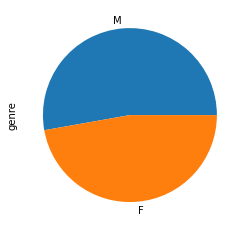

In [98]:
df["genre"].value_counts().plot(kind="pie")

<AxesSubplot:>

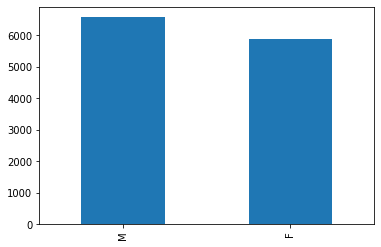

In [99]:
df["genre"].value_counts().plot(kind="bar")

<AxesSubplot:>

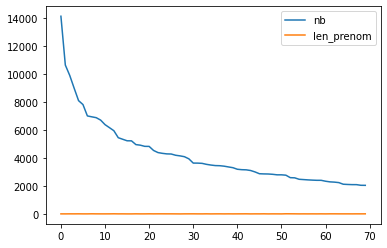

In [108]:
df[df["nb"] > 2000].plot()

<AxesSubplot:xlabel='nb', ylabel='len_prenom'>

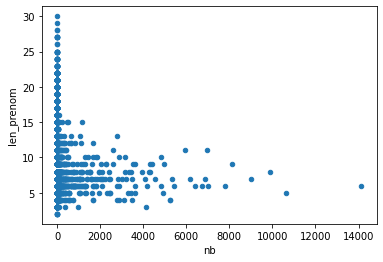

In [109]:
df.plot.scatter(x='nb',y='len_prenom')

<AxesSubplot:xlabel='len_prenom', ylabel='nb'>

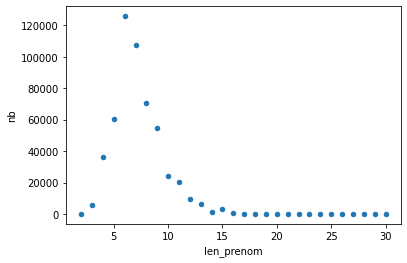

In [113]:
df.groupby("len_prenom")["nb"].sum().reset_index().plot.scatter(x="len_prenom", y="nb")

<AxesSubplot:>

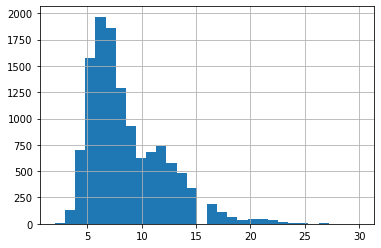

In [115]:
df["len_prenom"].hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

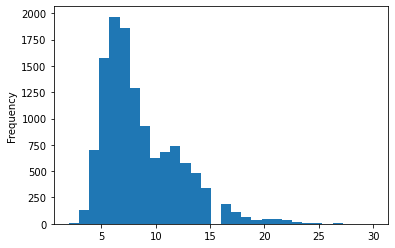

In [118]:
df["len_prenom"].plot(kind="hist", bins=30)

<AxesSubplot:ylabel='Frequency'>

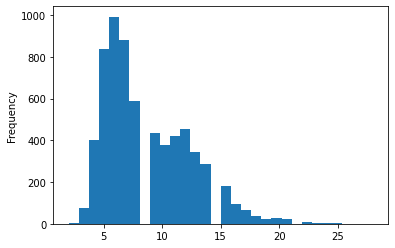

In [121]:
df[df["genre"] == "M"]["len_prenom"].plot(kind="hist", bins=30)

In [123]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

## Analyse population

In [209]:
# ça n'est pas la solution juste un snippet
import requests
import io

URL = "https://raw.githubusercontent.com/Bl3f/amse2021/main/Groupe-A/population.csv"
response = requests.get(URL)

df = pd.read_csv(io.StringIO(response.content.decode("utf-8")))

In [125]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105000.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530000.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784000.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2879000.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,77000.0,NaN


## Afficher l'évolution de la population française depuis 1960

In [133]:
df.T  # fonction .T permet de transposer

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Code,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Indicator Name,"Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total",...,"Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total"
Indicator Code,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,...,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL
1960,54211.0,8996351.0,5643182.0,1608800.0,13411.0,92490932.0,92634.0,20619075.0,1874120.0,20013.0,...,32000.0,34743000.0,63699.0,3034193297.0,108646.0,947000.0,5172135.0,17396367.0,3044846.0,3747369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,103795.0,32758020.0,26920466.0,2889104.0,79223.0,390043028.0,9070867.0,42981515.0,2906220.0,55437.0,...,104170.0,90728900.0,258850.0,7268986175.73916,192290.0,1821800.0,26246327.0,54146734.739162,15620974.0,15411675.0
2015,104341.0,33736494.0,27859305.0,2880703.0,78014.0,398304960.0,9154302.0,43417765.0,2916950.0,55537.0,...,103574.0,91713300.0,264603.0,7355220411.68203,193759.0,1801800.0,26916207.0,55011976.682029,16100587.0,15777451.0
2016,104822.0,34656032.0,28813463.0,2876101.0,77281.0,406452690.0,9269612.0,43847430.0,2924816.0,55599.0,...,102951.0,92701100.0,270402.0,7442135578.0,195125.0,1816200.0,27584213.0,55908865.0,16591390.0,16150362.0
2017,105000.0,35530000.0,29784000.0,2879000.0,77000.0,414481000.0,9400000.0,44271000.0,2930000.0,56000.0,...,103000.0,93652000.0,276000.0,7523997000.0,196000.0,1814000.0,28250000.0,56639000.0,17094000.0,16530000.0


In [168]:
df.set_index("Country Name").head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105000.0,NaN
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530000.0,NaN
Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784000.0,NaN
Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2879000.0,NaN
Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,77000.0,NaN


In [146]:
df.loc[:,"1960":"2017"].apply(lambda x: x.tolist(), axis=1)

0      [54211.0, 55438.0, 56225.0, 56695.0, 57032.0, ...
1      [8996351.0, 9166764.0, 9345868.0, 9533954.0, 9...
2      [5643182.0, 5753024.0, 5866061.0, 5980417.0, 6...
3      [1608800.0, 1659800.0, 1711319.0, 1762621.0, 1...
4      [13411.0, 14375.0, 15370.0, 16412.0, 17469.0, ...
                             ...                        
259    [947000.0, 966000.0, 994000.0, 1022000.0, 1050...
260    [5172135.0, 5260501.0, 5351799.0, 5446063.0, 5...
261    [17396367.0, 17850045.0, 18322335.0, 18809939....
262    [3044846.0, 3140264.0, 3240587.0, 3345145.0, 3...
263    [3747369.0, 3870756.0, 3999419.0, 4132756.0, 4...
Length: 264, dtype: object

<AxesSubplot:>

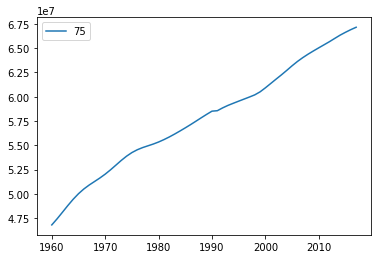

In [150]:
df.loc[df["Country Name"] == "France","1960":"2017"].T.plot()

## Dans le même graphique comparer la France, l'Allemagne et le Japon

In [169]:
df = df.set_index("Country Name")

<AxesSubplot:>

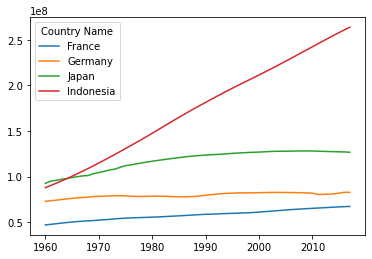

In [171]:
df.loc[["France","Germany","Japan", "Indonesia"] ,"1960":"2017"].T.plot()

<AxesSubplot:>

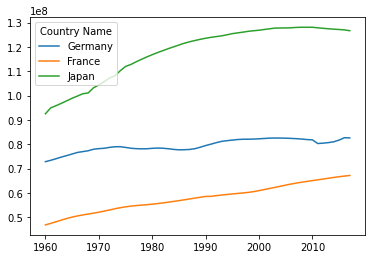

In [175]:
df.loc[df.index.isin(["France", "Germany", "Japan"]), "1960":"2017"].T.plot()

# or

# df.loc[df["Country Name"].isin(["France", "Germany", "Japan"]), "1960":"2017"].T.plot()

## Afficher dans une grille 4 x 4 l'évolution de la population des 16 pays les plus peuplés en 1960

In [198]:
df.sort_values("1960", ascending=False)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
World,WLD,"Population, total",SP.POP.TOTL,3.034193e+09,3.075115e+09,3.127961e+09,3.192794e+09,3.258201e+09,3.324952e+09,3.394865e+09,...,6.847215e+09,6.930657e+09,7.012844e+09,7.097401e+09,7.182860e+09,7.268986e+09,7.355220e+09,7.442136e+09,7.523997e+09,NaN
IDA & IBRD total,IBT,"Population, total",SP.POP.TOTL,2.301898e+09,2.331636e+09,2.374689e+09,2.429878e+09,2.485749e+09,2.543191e+09,2.604312e+09,...,5.725607e+09,5.801349e+09,5.877978e+09,5.955532e+09,6.033915e+09,6.112778e+09,6.191917e+09,6.271593e+09,6.348082e+09,NaN
Low & middle income,LMY,"Population, total",SP.POP.TOTL,2.279584e+09,2.309160e+09,2.352010e+09,2.406932e+09,2.462536e+09,2.519876e+09,2.581011e+09,...,5.705229e+09,5.781145e+09,5.857845e+09,5.935501e+09,6.014016e+09,6.093020e+09,6.172291e+09,6.252106e+09,6.328725e+09,NaN
Middle income,MIC,"Population, total",SP.POP.TOTL,2.124914e+09,2.151091e+09,2.190460e+09,2.241781e+09,2.293605e+09,2.346946e+09,2.403852e+09,...,5.160329e+09,5.221138e+09,5.282272e+09,5.343924e+09,5.406029e+09,5.468260e+09,5.530432e+09,5.592833e+09,5.651718e+09,NaN
IBRD only,IBD,"Population, total",SP.POP.TOTL,1.919408e+09,1.939836e+09,1.973218e+09,2.018350e+09,2.063747e+09,2.110280e+09,2.160019e+09,...,4.383581e+09,4.427798e+09,4.472296e+09,4.517417e+09,4.562691e+09,4.607808e+09,4.652578e+09,4.697247e+09,4.738332e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St. Martin (French part),MAF,"Population, total",SP.POP.TOTL,4.279000e+03,4.453000e+03,4.566000e+03,4.656000e+03,4.748000e+03,4.841000e+03,4.936000e+03,...,2.982000e+04,3.023500e+04,3.061500e+04,3.095900e+04,3.126400e+04,3.153000e+04,3.175400e+04,3.194900e+04,NaN,NaN
Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.702218e+06,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.674000e+06,NaN


In [180]:
ref = pd.read_csv("country_ref.csv")

In [210]:
population = df.merge(ref, left_on="Country Code", right_on="isocode_3")

In [211]:
population.sort_values("1960", ascending=False).iloc[:16]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,Unnamed: 62,name,isocode_2,isocode_3,numeric_code
35,China,CHN,"Population, total",SP.POP.TOTL,667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,...,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09,1.383981e+09,NaN,China,CN,CHN,156
88,India,IND,"Population, total",SP.POP.TOTL,449480608.0,458494963.0,467852537.0,477527970.0,487484535.0,497702365.0,...,1.278562e+09,1.293859e+09,1.309054e+09,1.324171e+09,1.339180e+09,NaN,India,IN,IND,356
202,United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,...,3.162049e+08,3.185635e+08,3.208966e+08,3.231275e+08,3.255240e+08,NaN,United States of America (the),US,USA,840
164,Russian Federation,RUS,"Population, total",SP.POP.TOTL,119897000.0,121236000.0,122591000.0,123960000.0,125345000.0,126745000.0,...,1.435069e+08,1.438197e+08,1.440969e+08,1.443424e+08,1.442310e+08,NaN,Russian Federation (the),RU,RUS,643
97,Japan,JPN,"Population, total",SP.POP.TOTL,92500572.0,94943000.0,95832000.0,96812000.0,97826000.0,98883000.0,...,1.274450e+08,1.272760e+08,1.271410e+08,1.269945e+08,1.266410e+08,NaN,Japan,JP,JPN,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,France,FRA,"Population, total",SP.POP.TOTL,46814237.0,47444751.0,48119649.0,48803680.0,49449403.0,50023774.0,...,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07,6.714300e+07,NaN,France,FR,FRA,250
141,Nigeria,NGA,"Population, total",SP.POP.TOTL,45137812.0,46062905.0,47029140.0,48032246.0,49066059.0,50127214.0,...,1.718293e+08,1.764605e+08,1.811817e+08,1.859896e+08,1.908860e+08,NaN,Nigeria,NG,NGA,566
149,Pakistan,PAK,"Population, total",SP.POP.TOTL,44908293.0,45984892.0,47119361.0,48309315.0,49551904.0,50845221.0,...,1.817126e+08,1.855463e+08,1.893805e+08,1.932035e+08,1.970160e+08,NaN,Pakistan,PK,PAK,586
200,Ukraine,UKR,"Population, total",SP.POP.TOTL,42662149.0,43203635.0,43749470.0,44285899.0,44794327.0,45261935.0,...,4.548960e+07,4.527195e+07,4.515403e+07,4.500464e+07,4.477600e+07,NaN,Ukraine,UA,UKR,804


In [195]:
import matplotlib.pyplot as plt

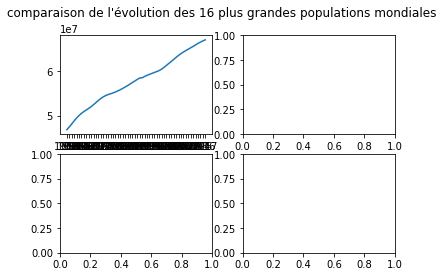

In [197]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("comparaison de l'évolution des 16 plus grandes populations mondiales")
ax1.plot(df.loc[df.index.isin(["France"]), "1960":"2017"].T.index, df.loc[df.index.isin(["France"]), "1960":"2017"].T)

In [215]:
top_16 = population.sort_values("1960", ascending=False).iloc[:16].set_index("Country Name").T

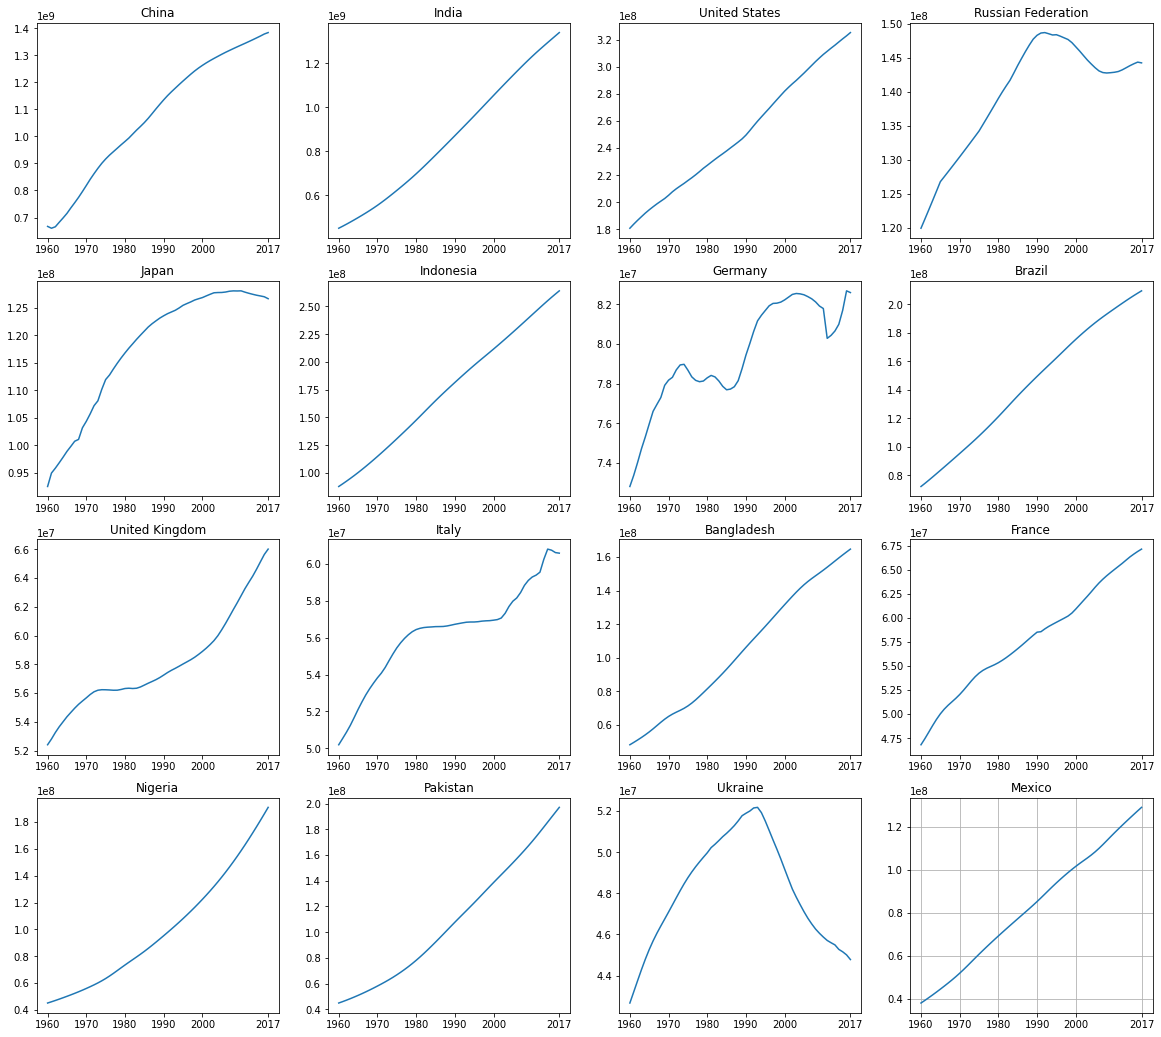

In [232]:
fig, ax = plt.subplots(4, 4, figsize=(20, 10))

for index, country in enumerate(top_16.columns):
    ax[index // 4][index % 4].set_title(country)
    ax[index // 4][index % 4].plot(top_16.loc["1960":"2017", country])
    
plt.setp(ax, xticks=["1960", "1970", "1980", "1990", "2000", "2017"])
plt.subplots_adjust(top=1.5)
plt.savefig("top16.jpg")
plt.show()